In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [20]:
df = pd.read_csv('agaricus-lepiota.data')
df.pop('edibility')
dummies = pd.get_dummies(df)

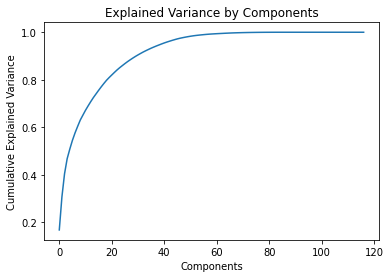

In [21]:
pca = PCA() # Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. 
pca.fit(dummies) # Fit the model with X.
l = len(pca.explained_variance_ ) # variability in a data set that can be attributed to each individual principal component
plt.figure()
plt.plot(range(0, l), pca.explained_variance_ratio_.cumsum()) # pca.explained_variance_ratio_.cumsum() 
# Returns the cumulative variance explained by the first i+1 dimensions.
plt.title('Explained Variance by Components')
plt.xlabel('Components')
plt.ylabel('Cumulative Explained Variance')
plt.show() 

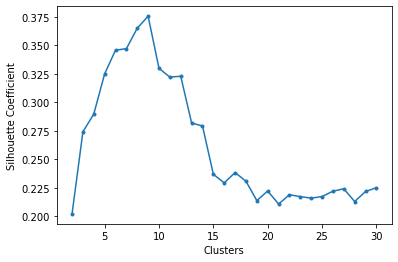

Optimal number of clusters: 7


In [4]:
# 80% variance can be found by 20 components.
pca = PCA(n_components=20)
pca_df = pca.fit_transform(dummies)
sc = []
for i in range(2, 31):
    kmeans_pca = KMeans(n_clusters=i, init = 'k-means++') # 'k-means++' selects initial cluster centroids using sampling based on an empirical probability distribution of the points’ contribution to the overall inertia.
    kmeans_pca.fit(pca_df) # Compute k-means clustering using dataframe made fitted by PCA.
    sc.append(metrics.silhouette_score(pca_df, kmeans_pca.labels_, metric='euclidean')) # Silhuette coefficient (b - a)/max(a, b)
plt.figure()
plt.plot(range(2,31), sc, marker=".")
plt.xlabel('Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()
print(f"Optimal number of clusters: {sc.index(max(sc))}")
# the higher the score the more likely the test is to its own cluster rather than being closer to another cluster

In [18]:
n = 6
optimal_nr_of_clusters_indices = sorted(sc)[-n:]
indices_to_access = map(lambda item: sc.index(item), optimal_nr_of_clusters_indices)
n_best_k = list(indices_to_access)[::-1]
print(f"{n} best values for k: {n_best_k}")

6 best values for k: [7, 6, 5, 4, 8, 3]


6 best values for k: [7, 6, 5, 4, 8, 3]


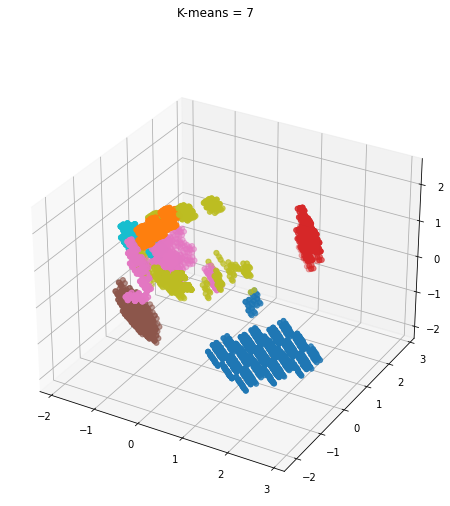

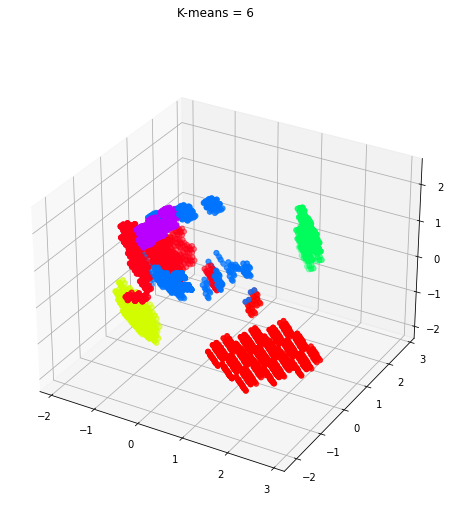

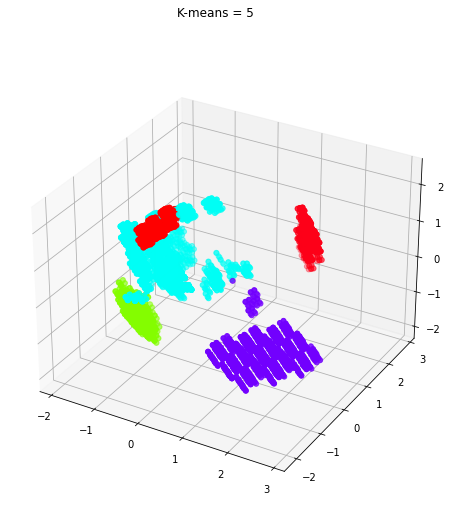

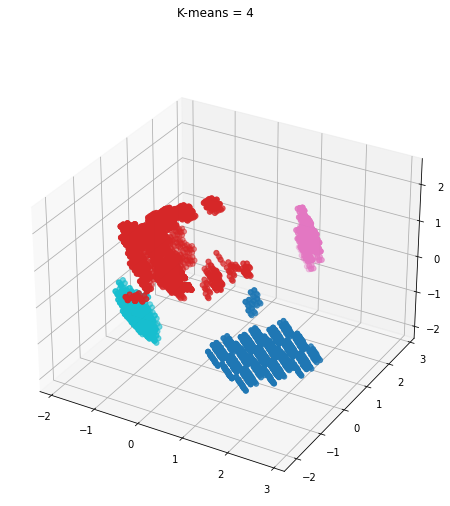

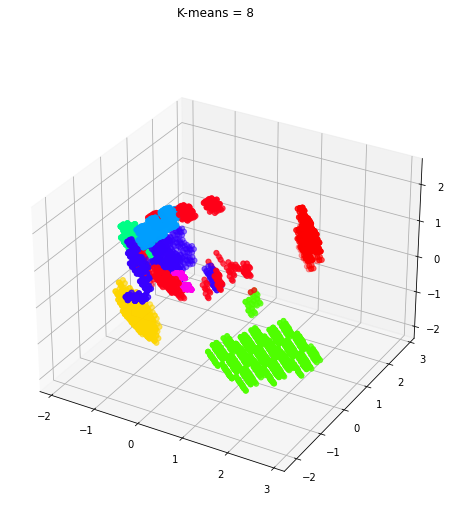

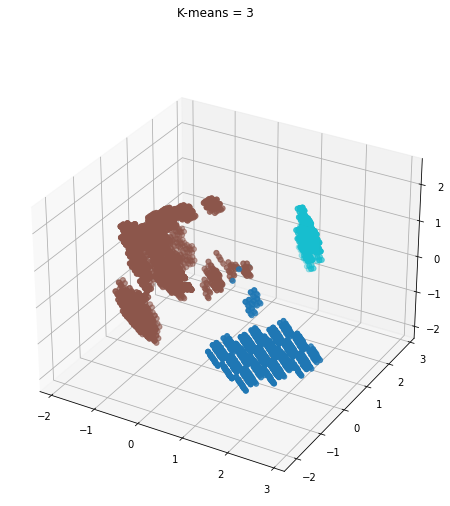

In [19]:
print(f"{n} best values for k: {n_best_k}")
colors =  ['tab10', 'Spectral', 'coolwarm', 'hsv']
for i in range(len(n_best_k)):
    k = n_best_k[i]
    labels = KMeans(n_clusters=k).fit_predict(pca_df) # Compute cluster centers and predict cluster index for each sample.
    pca = PCA(n_components=k)
    x_plot = np.array(pca.fit_transform(dummies))
    fig = plt.figure(figsize=(8,8))
    fig.suptitle(f"K-means = {k} ")
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x_plot[:,0], x_plot[:,1], x_plot[:,2], c=labels, s=25, cmap=colors[random.randint(len(colors))])